In [2]:
library(readxl)
df = read_excel("/content/Only Dataset for use ---- Orginal data.xlsx")
head(df, 3)   # shows first 10 rows

Player name,Rider_class,Stage,Points,Stage_class
<chr>,<chr>,<chr>,<dbl>,<chr>
Tadej Pogačar,All Rounder,X1,15,flat
Tadej Pogačar,All Rounder,X2,219,hills
Tadej Pogačar,All Rounder,X3,34,flat


# Question (a) Describtive Statistics



# Rider Class

In [3]:
library(dplyr)
# Descriptive statistics by rider class
desc_by_rider <- df %>%
  group_by(Rider_class) %>%
  summarise(
    count = n(),
    mean = mean(Points),
    std = sd(Points),
    min = min(Points),
    q25 = quantile(Points, 0.25),
    median = quantile(Points, 0.5),
    q75 = quantile(Points, 0.75),
    max = max(Points),
    sum_points = sum(Points)
  )

desc_by_rider


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rider_class,count,mean,std,min,q25,median,q75,max,sum_points
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
All Rounder,323,37.68731,63.96164,0,0,12,39.5,304,12173
Climber,437,20.16934,43.44725,0,0,6,16.0,269,8814
Sprinter,551,15.03630,41.83225,0,0,0,4.0,272,8285
Unclassed,2185,6.41968,23.28253,0,0,0,2.0,260,14027


# Rider class across Stage class

In [4]:
# Descriptive for Rider class and Stage class

library(dplyr)
# Compute the statistics by Rider_class and Stage_class
stats <- df %>%
  group_by(Rider_class, Stage_class) %>%
  summarise(
    count = n(),
    Sum_Points = sum(Points),
    mean = mean(Points),
    std = sd(Points),
    min = min(Points),
    q25 = quantile(Points, 0.25),
    q50 = quantile(Points, 0.5),
    q75 = quantile(Points, 0.75),
    max = max(Points)
  ) %>%
  # Rename columns
  rename(
    `Sum Points` = Sum_Points, # Backticks for spaces in column names
    `0.25` = q25,
    `0.50` = q50,
    `0.75` = q75
  )
# Print with infinite width to display all columns
print(stats, width = Inf)

`summarise()` has grouped output by 'Rider_class'. You can override using the
`.groups` argument.


# A tibble: 12 × 11
# Groups:   Rider_class [4]
   Rider_class Stage_class count `Sum Points`  mean   std   min `0.25` `0.50`
   <chr>       <chr>       <int>        <dbl> <dbl> <dbl> <dbl>  <dbl>  <dbl>
 1 All Rounder flat          102         1575 15.4  28.3      0      0    8  
 2 All Rounder hills         136         4867 35.8  57.5      0      0   12.5
 3 All Rounder mount          85         5731 67.4  89.0      0      0   17  
 4 Climber     flat          138          703  5.09  6.23     0      0    1.5
 5 Climber     hills         184         3987 21.7  46.0      0      0    7  
 6 Climber     mount         115         4124 35.9  57.0      0      0   12  
 7 Sprinter    flat          174         6782 39.0  63.6      0      0    2.5
 8 Sprinter    hills         232         1207  5.20 22.0      0      0    0  
 9 Sprinter    mount         145          296  2.04  5.89     0      0    0  
10 Unclassed   flat          690         3961  5.74 19.8      0      0    0  
11 Unclassed   h

# Graphical

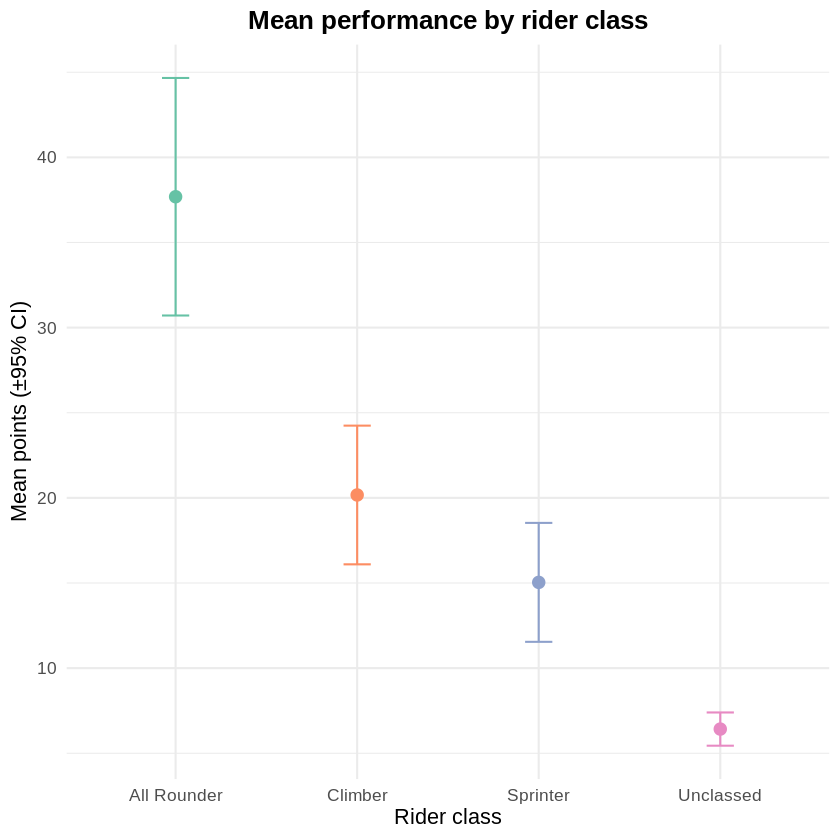

In [ ]:
library(readxl)
library(ggplot2)
library(dplyr)

df$Riderclass <- factor(df$Riderclass)

summary_df <- df %>%
  group_by(Riderclass) %>%
  summarise(
    mean_pts = mean(Points),
    se = sd(Points) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    lower = mean_pts - 1.96 * se,
    upper = mean_pts + 1.96 * se
  )

ggplot(summary_df, aes(x = Riderclass, y = mean_pts, colour = Riderclass)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.15) +
  labs(x = "Rider class", y = "Mean points (±95% CI)",
       title = "Mean performance by rider class") +
  scale_color_brewer(palette = "Set2") +
  theme_minimal(base_size = 13) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        legend.position = "none")


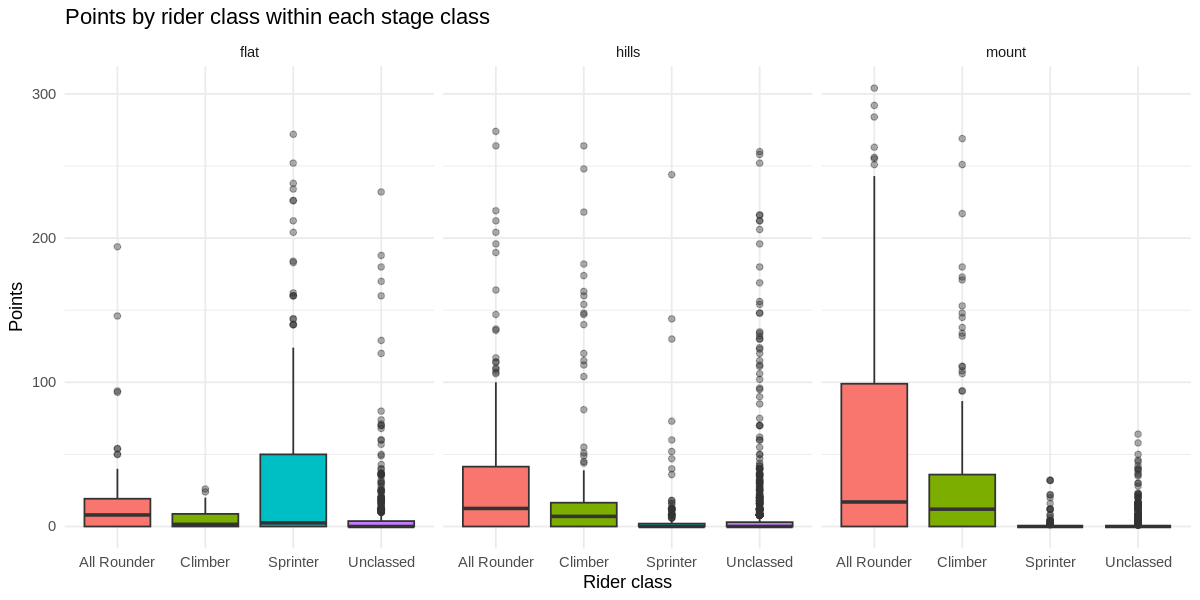

In [ ]:

# 2) Faceted boxplots by stage class
ggplot(df,
       aes(x = Rider_class,
           y = Points,
           fill = Rider_class)) +
  geom_boxplot(outlier.alpha = 0.4) +
  facet_wrap(~ Stage_class) +
  labs(x = "Rider class",
       y = "Points",
       title = "Points by rider class within each stage class") +
  theme_minimal() +
  theme(legend.position = "none")

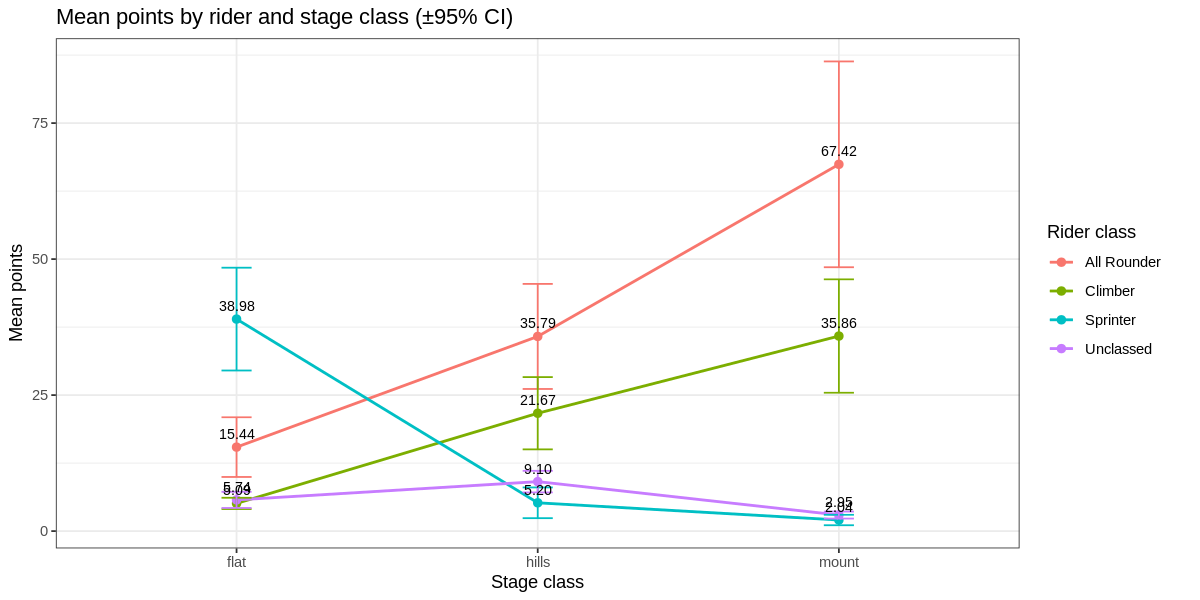

In [ ]:
library(dplyr)
library(ggplot2)

sum_dat <- df %>%
  group_by(Stage_class, Rider_class) %>%
  summarise(
    mean_points = mean(Points, na.rm = TRUE),
    se = sd(Points, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    ci_low  = mean_points - 1.96 * se,
    ci_high = mean_points + 1.96 * se,
    label   = sprintf("%.2f", mean_points)
  )

ggplot(sum_dat,
       aes(x = Stage_class,
           y = mean_points,
           group = Rider_class,
           colour = Rider_class)) +
  geom_line(size = 0.8) +
  geom_point(size = 2) +
  geom_errorbar(aes(ymin = ci_low, ymax = ci_high),
                width = 0.1, size = 0.5) +
  geom_text(aes(label = label),
            vjust = -0.8, size = 3, colour = "black") +
  labs(x = "Stage class",
       y = "Mean points",
       colour = "Rider class",
       title = "Mean points by rider and stage class (±95% CI)") +
  theme_bw()


# B) Hypothesis Testing

# Rider Class

In [5]:
# Run the Annova Test

df = read_excel("/content/Only Dataset for use ---- Orginal data.xlsx")

# 2. Ensure Riderclass is a factor
df$Riderclass <- factor(df$Rider_class)

# 3. Fit one-way ANOVA: Points ~ Riderclass
anova_model <- aov(Points ~ Rider_class, data = df)

# 4. ANOVA table
summary(anova_model)

resid_anova <- residuals(anova_model)
fitted_anova <- fitted(anova_model)
summary(anova_model)

              Df  Sum Sq Mean Sq F value Pr(>F)    
Rider_class    3  314894  104965    85.5 <2e-16 ***
Residuals   3492 4286712    1228                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df  Sum Sq Mean Sq F value Pr(>F)    
Rider_class    3  314894  104965    85.5 <2e-16 ***
Residuals   3492 4286712    1228                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Check the assumptions of Normality

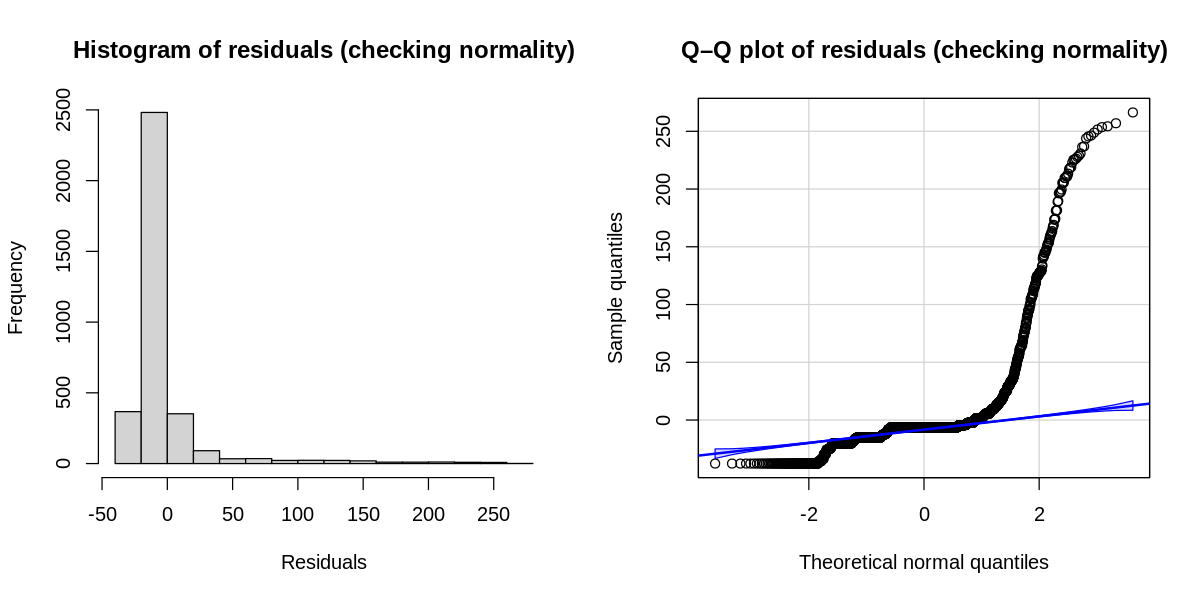

In [ ]:
# Graphical
options(repr.plot.width = 10, repr.plot.height = 5) # Set a larger display size for combined plots

par(mfrow = c(1, 2)) # combine plots

# histogram
hist(resid_anova,main = "Histogram of residuals (checking normality)", xlab = 'Residuals', ylab = 'Frequency')

# QQ-plot
library(car)
qqPlot(resid_anova,main = "Q–Q plot of residuals (checking normality)",xlab = "Theoretical normal quantiles",ylab='Sample quantiles',
  id = FALSE # id = FALSE to remove point identification
)

In [6]:
# Shapiro–Wilk test (one test on all residuals)
shapiro.test(resid_anova)


	Shapiro-Wilk normality test

data:  resid_anova
W = 0.49429, p-value < 2.2e-16


In [ ]:
# Homogeneity Test
library(car) # Load the car package
#3) Homogeneity of variances (Levene’s test)
leveneTest(Points ~ Rider_class, data = df)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,83.07573,6.488153e-52
,3492,NA,NA


In [7]:
#Kruskal Walis Test

# 2. Ensure Riderclass is a factor
df$Riderclass <- factor(df$Riderclass)

# 3. Kruskal–Wallis test: Points across Riderclass
kruskal.test(Points ~ Riderclass, data = df)


	Kruskal-Wallis rank sum test

data:  Points by Riderclass
Kruskal-Wallis chi-squared = 330.2, df = 3, p-value < 2.2e-16


In [ ]:
# Post Hoc test
install.packages("FSA") # Install the FSA package
library(FSA)       # or dunn.test package
dunnTest(Points ~ Riderclass, data = df, method = "holm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘zoo’, ‘car’, ‘dunn.test’, ‘FlexParamCurve’, ‘lmtest’, ‘plotrix’


## FSA v0.10.0. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




               Comparison         Z      P.unadj        P.adj
1   All Rounder - Climber  2.544777 1.093476e-02 1.093476e-02
2  All Rounder - Sprinter 10.383179 2.957600e-25 1.183040e-24
3      Climber - Sprinter  8.444087 3.064303e-17 9.192909e-17
4 All Rounder - Unclassed 14.479270 1.638276e-47 9.829659e-47
5     Climber - Unclassed 12.908115 4.050986e-38 2.025493e-37
6    Sprinter - Unclassed  2.842743 4.472718e-03 8.945437e-03

# Hypothesis of Rider class across Stage Class

# ART Anova Test

In [ ]:
#install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
# Check the assumptions

# 1. Load packages
library(readxl)
library(ggplot2)
#install.packages("car") # Install the car package
library(car)      # for qqPlot, Anova (type II/III) if needed

# 2. Read data
df <- read_excel("/content/Only Dataset for use ---- Orginal data.xlsx")

# Ensure factors
df$Rider_class  <- factor(df$Rider_class)
df$Stage_class  <- factor(df$Stage_class)

# 3. Two-way ANOVA: Points ~ Riderclass * Stageclass
anova_model <- aov(Points ~ Rider_class * Stage_class, data = df)
summary(anova_model)
resid_anova_two <- residuals(anova_model)

Loading required package: carData

Registered S3 methods overwritten by 'car':
  method       from
  hist.boot    FSA 
  confint.boot FSA 


Attaching package: ‘car’


The following object is masked from ‘package:FSA’:

    bootCase


The following object is masked from ‘package:dplyr’:

    recode




                          Df  Sum Sq Mean Sq F value Pr(>F)    
Rider_class                3  314894  104965  92.816 <2e-16 ***
Stage_class                2     636     318   0.281  0.755    
Rider_class:Stage_class    6  346065   57677  51.002 <2e-16 ***
Residuals               3484 3940012    1131                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Check Assumptions

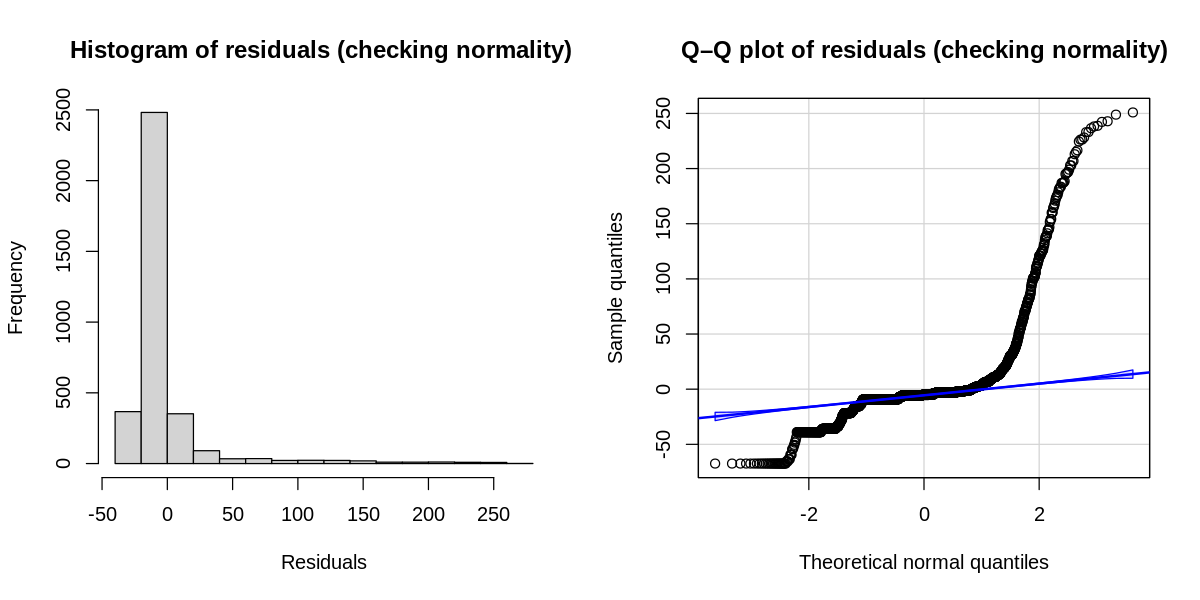

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5) # Set a larger display size for combined plots

par(mfrow = c(1, 2)) # combine plots

# histogram
hist(resid_anova,main = "Histogram of residuals (checking normality) ",xlab = 'Residuals', ylab = 'Frequency')

# QQ-plot
library(car)
qqPlot(resid_anova_two,main = "Q–Q plot of residuals (checking normality)",xlab = "Theoretical normal quantiles",ylab='Sample quantiles',
  id = FALSE # id = FALSE to remove point identification
)

In [ ]:
# 4. Residuals
resid_anova <- residuals(anova_model)

# 5. Shapiro–Wilk normality test for residuals
shapiro.test(resid_anova)


	Shapiro-Wilk normality test

data:  resid_anova
W = 0.556, p-value < 2.2e-16


In [ ]:
# Homogeneity test Equal variance Test

library(readxl)
library(car)

df$Riderclass  <- factor(df$Rider_class)
df$Stageclass  <- factor(df$Stage_class)

# Levene’s test across Riderclass x Stageclass groups
leveneTest(Points ~ Riderclass * Stageclass, data = df)


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,11,54.40912,1.54796e-111
,3484,NA,NA


# Post Hoc test

In [ ]:
install.packages(c("ARTool", "emmeans"))
install.packages("effectsize")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘plyr’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’




In [ ]:
library(ARTool)
library(emmeans)
library(dplyr)

m_art2 <- art(Points ~ Rider_class * Stage_class, data = df)
anova(m_art2)

emm_int <- emmeans(
  artlm(m_art2, "Rider_class:Stage_class"),
  ~ Rider_class | Stage_class
)

# Holm adjustment instead of Tukey
pairs_int <- pairs(emm_int, adjust = "holm")

tab_posthoc <- as.data.frame(pairs_int) %>%
  relocate(Stage_class, .before = contrast) %>%
  rename(
    comparison = contrast,
    p_adj      = p.value
  )

View(tab_posthoc)
# write.csv(tab_posthoc, "ART_RiderWithinStage_posthoc_Holm.csv", row.names = FALSE)


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rider_class,Rider_class,3,3484,309081064,2204340202,162.83609,8.873465e-99
Stage_class,Stage_class,2,3484,75811487,2633097785,50.15522,3.353852e-22
Rider_class:Stage_class,Rider_class:Stage_class,6,3484,320281204,2301903402,80.79254,6.359836e-95


,Stage_class,comparison,estimate,SE,df,t.ratio,p_adj
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,flat,All Rounder - Climber,-217.88875,106.13789,3484,-2.0528836,4.015839e-02
2,flat,All Rounder - Sprinter,-1289.90974,101.36413,3484,-12.7255047,1.083399e-35
3,flat,All Rounder - Unclassed,-1934.76846,86.22683,3484,-22.4381251,1.457664e-103
4,flat,Climber - Sprinter,-1072.02099,92.65473,3484,-11.5700620,6.259554e-30
5,flat,Climber - Unclassed,-1716.87971,75.79762,3484,-22.6508401,2.640875e-105
6,flat,Sprinter - Unclassed,-644.85872,68.95443,3484,-9.3519548,2.989200e-20
7,hills,All Rounder - Climber,-149.22251,91.91811,3484,-1.6234287,1.045883e-01
8,hills,All Rounder - Sprinter,190.06947,87.78391,3484,2.1651971,6.088053e-02
9,hills,All Rounder - Unclassed,-1014.79425,74.67463,3484,-13.5895454,2.520292e-40


In [ ]:
# Not use the Tukey's test ---- As for question 1 i use Holm test so For question 2 also use Holm



library(ARTool)
library(emmeans)
library(dplyr)

# ART model with interaction
m_art2 <- art(Points ~ Rider_class * Stage_class, data = df)
anova(m_art2)

# EMMs: Rider_class within each Stage_class
emm_int <- emmeans(
  artlm(m_art2, "Rider_class:Stage_class"),
  ~ Rider_class | Stage_class
)

# Pairwise comparisons with Tukey adjustment
pairs_int <- pairs(emm_int, adjust = "tukey")

# Convert to one clean table
tab_posthoc <- as.data.frame(pairs_int)

# Optional: reorder/rename columns for nicer output
tab_posthoc <- tab_posthoc %>%
  relocate(Stage_class, .before = contrast) %>%   # keep Stage_class as first column
  rename(
    comparison = contrast,
    p_adj      = p.value
  )

# View or export
View(tab_posthoc)
# write.csv(tab_posthoc, "ART_RiderWithinStage_posthoc_Tukey.csv", row.names = FALSE)


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rider_class,Rider_class,3,3484,309081064,2204340202,162.83609,8.873465e-99
Stage_class,Stage_class,2,3484,75811487,2633097785,50.15522,3.353852e-22
Rider_class:Stage_class,Rider_class:Stage_class,6,3484,320281204,2301903402,80.79254,6.359836e-95


,Stage_class,comparison,estimate,SE,df,t.ratio,p_adj
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,flat,All Rounder - Climber,-217.88875,106.13789,3484,-2.0528836,1.690421e-01
2,flat,All Rounder - Sprinter,-1289.90974,101.36413,3484,-12.7255047,2.336338e-09
3,flat,All Rounder - Unclassed,-1934.76846,86.22683,3484,-22.4381251,2.336338e-09
4,flat,Climber - Sprinter,-1072.02099,92.65473,3484,-11.5700620,2.336338e-09
5,flat,Climber - Unclassed,-1716.87971,75.79762,3484,-22.6508401,2.336338e-09
6,flat,Sprinter - Unclassed,-644.85872,68.95443,3484,-9.3519548,2.336377e-09
7,hills,All Rounder - Climber,-149.22251,91.91811,3484,-1.6234287,3.654558e-01
8,hills,All Rounder - Sprinter,190.06947,87.78391,3484,2.1651971,1.332365e-01
9,hills,All Rounder - Unclassed,-1014.79425,74.67463,3484,-13.5895454,2.336338e-09
